In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...


In [3]:
%cd ultralytics
!pip install ultralytics
import ultralytics

ultralytics.checks()

Ultralytics 8.3.184  Python-3.12.2 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
Setup complete  (16 CPUs, 15.6 GB RAM, 118.4/158.5 GB disk)


In [4]:
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!pip install gdown
import gdown


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%cd ..

e:\semester\sem 7\honeywell\human_detection


c:\Users\Gythiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import os

dataset_path = r"E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset"
files = os.listdir(dataset_path)
print(files)


['data.yaml', 'train', 'val']


In [9]:
import yaml
import os

dataset_info = {
    'train': r"E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\train\images",
    'val': r"E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\images",
    'path': r"E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset",
    'nc': 1,
    'names': ['Human']
}

output_yaml = r"E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\data.yaml"

os.makedirs(os.path.dirname(output_yaml), exist_ok=True)

with open(output_yaml, 'w') as f:
    yaml.dump(dataset_info, f, default_flow_style=None, sort_keys=False)

print(f"YAML file created at: {output_yaml}")


YAML file created at: E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\data.yaml


In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8s.pt")

# Train
model.train(
    data="E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/data.yaml",
    epochs=20,
    imgsz=640
)


New https://pypi.org/project/ultralytics/8.3.184 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.70  Python-3.12.2 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\train\labels.cache... 2220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2220/2220 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\labels.cache... 1642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1642/1642 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.052     0.8731      1.055        159        640: 100%|██████████| 139/139 [32:22<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [05:57<00:00,  6.88s/it]


                   all       1642      13171      0.744      0.659      0.741      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.016     0.7467      1.041        133        640: 100%|██████████| 139/139 [31:36<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [08:00<00:00,  9.23s/it]


                   all       1642      13171      0.794      0.656      0.759      0.487

2 epochs completed in 1.304 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 22.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.70  Python-3.12.2 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [06:54<00:00,  7.98s/it]


                   all       1642      13171      0.793      0.657      0.759      0.487
Speed: 3.5ms preprocess, 192.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014919501BE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [1]:
print("Training complete.")

Training complete.


wandb.finish()

In [5]:
import wandb


In [6]:
wandb.finish()

In [7]:
from ultralytics import YOLO

# Load your trained model
model = YOLO(r"runs/detect/train2/weights/best.pt")  # use forward slashes or raw string

# Run validation
metrics = model.val(
    data=r"E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/data.yaml",
    imgsz=640
)

# Print results
print(metrics)


Ultralytics 8.3.70  Python-3.12.2 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\labels.cache... 1642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1642/1642 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [05:03<00:00,  2.95s/it]


                   all       1642      13171      0.793      0.657      0.759      0.487
Speed: 2.7ms preprocess, 136.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014916E079E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.

In [17]:
from ultralytics import YOLO
from IPython.display import Image, display

model = YOLO(r"runs/detect/train2/weights/best.pt")
img_path = r"E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/train/images/frame6006.45.00-06.50.00.jpg"

results = model.predict(source=img_path, save=True, imgsz=640, conf=0.25)

# Display output image
display(Image(filename=str(results[0].plot(save=True))))



image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\train\images\frame6006.45.00-06.50.00.jpg: 384x640 16 Humans, 147.6ms
Speed: 1.7ms preprocess, 147.6ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2


ValueError: Cannot embed the '
  [ 63  32 163]
  [ 57  35 161]
  [ 56  37 158]]]' image format


image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\train\images\frame6006.45.00-06.50.00.jpg: 384x640 16 Humans, 147.5ms
Speed: 0.0ms preprocess, 147.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict4


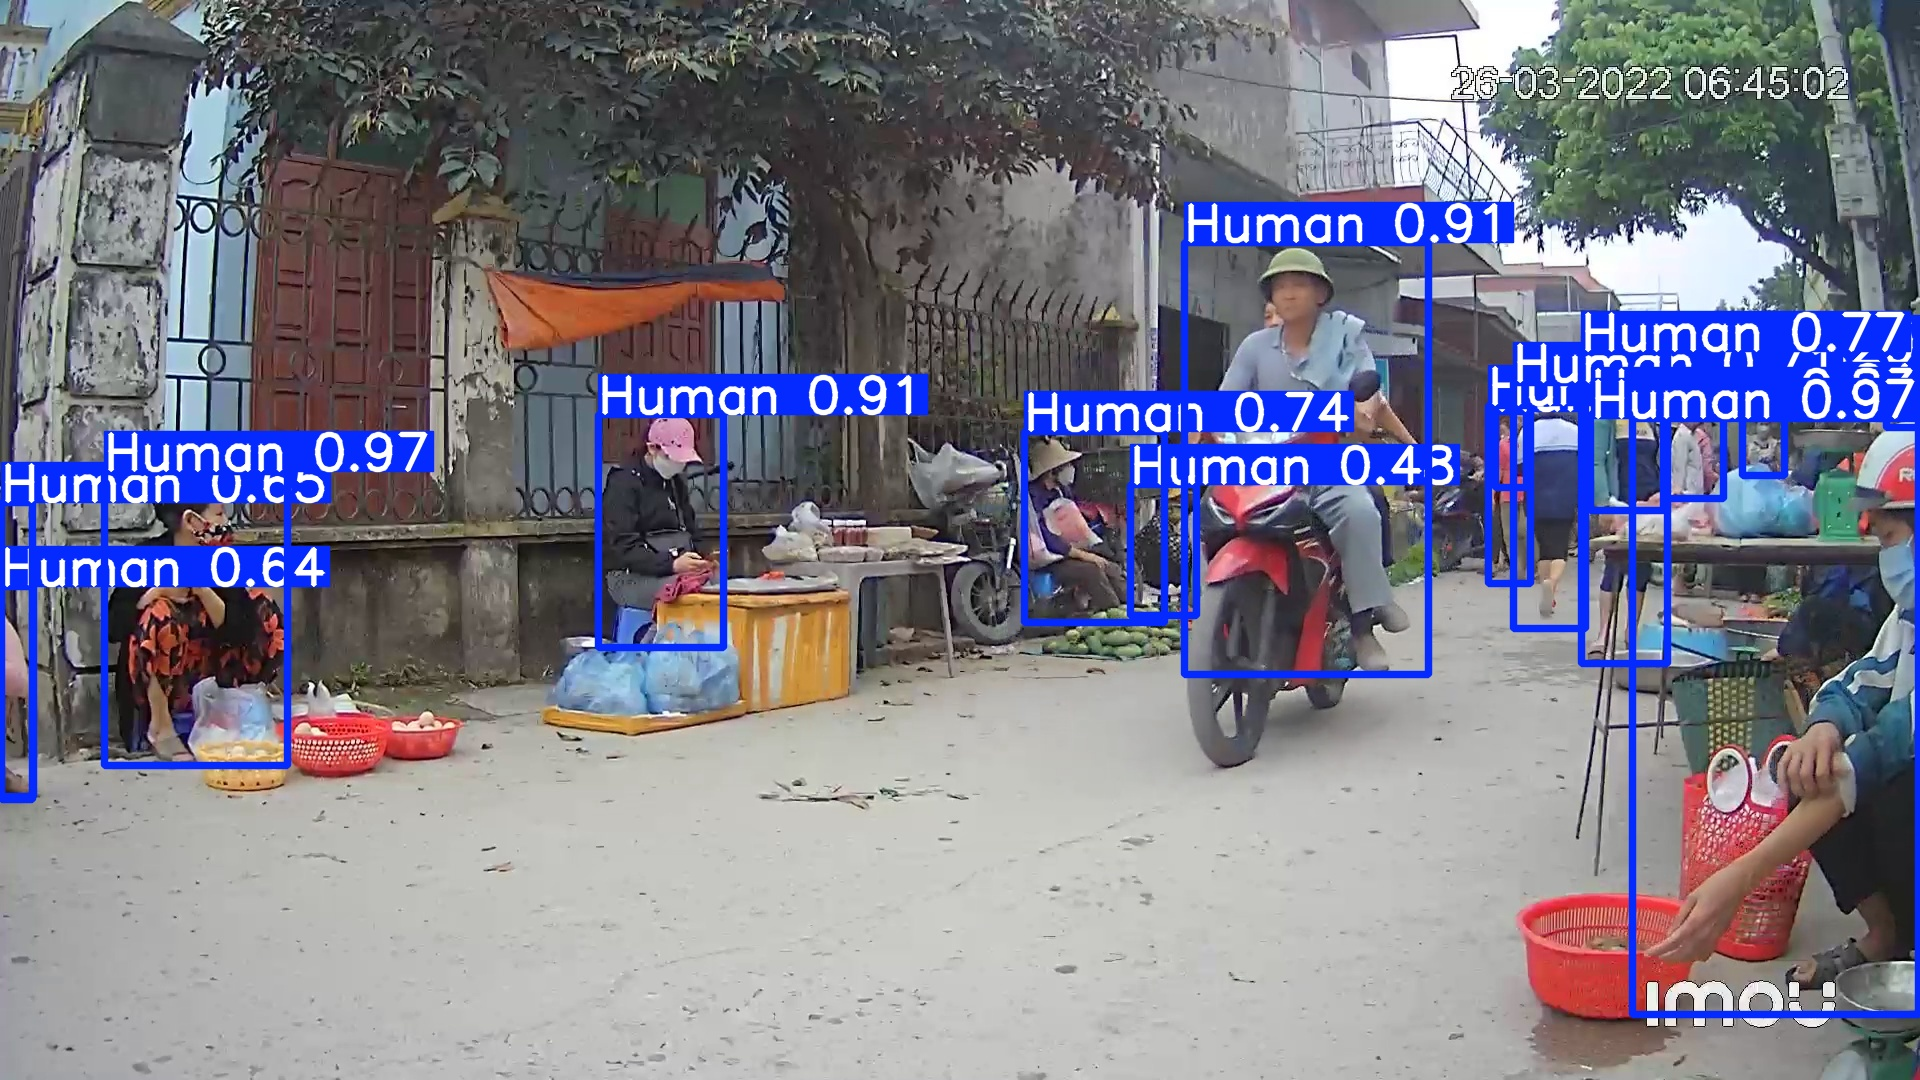


Detected objects:
Coordinates: [[     104.08      471.12      287.35      765.29]]  |  Confidence: 0.97  |  Class: 0
Coordinates: [[     1632.8      418.46      1918.7      1014.1]]  |  Confidence: 0.97  |  Class: 0
Coordinates: [[     1184.3      242.35        1428      674.35]]  |  Confidence: 0.91  |  Class: 0
Coordinates: [[      598.1      414.09      723.03      647.96]]  |  Confidence: 0.91  |  Class: 0
Coordinates: [[     1742.6      407.91      1784.3      475.42]]  |  Confidence: 0.83  |  Class: 0
Coordinates: [[     1581.5      351.12      1667.8      663.94]]  |  Confidence: 0.77  |  Class: 0
Coordinates: [[       1025      431.95      1164.5      622.46]]  |  Confidence: 0.74  |  Class: 0
Coordinates: [[     1513.7      382.79      1585.9      628.91]]  |  Confidence: 0.71  |  Class: 0
Coordinates: [[     1488.1      405.81      1530.5      583.27]]  |  Confidence: 0.70  |  Class: 0
Coordinates: [[     1.0568      502.91      32.851      799.35]]  |  Confidence: 0.65  |  

In [19]:
from ultralytics import YOLO
from IPython.display import Image, display
import glob
import os

# -------------------------
# Paths (update if needed)
# -------------------------
model_path = r"runs/detect/train2/weights/best.pt"
img_path = r"E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/train/images/frame6006.45.00-06.50.00.jpg"

# -------------------------
# Load model
# -------------------------
model = YOLO(model_path)

# -------------------------
# Run prediction
# -------------------------
results = model.predict(source=img_path, save=True, imgsz=640, conf=0.25)

# -------------------------
# Get latest saved image
# -------------------------
save_dir = results[0].save_dir  # folder where YOLO saved the image
saved_images = glob.glob(os.path.join(save_dir, "*.jpg"))
saved_images.sort()
latest_img = saved_images[-1]

# -------------------------
# Display annotated image
# -------------------------
display(Image(filename=latest_img, width=600))

# -------------------------
# Print bounding boxes info
# -------------------------
print("\nDetected objects:")
for box in results[0].boxes:
    print(f"Coordinates: {box.xyxy.cpu().numpy()}  |  Confidence: {box.conf.item():.2f}  |  Class: {int(box.cls.item())}")


In [20]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load trained model
model = YOLO(r"runs/detect/train2/weights/best.pt")

# Run validation
metrics = model.val(
    data=r"E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/data.yaml",
    imgsz=640
)

# Get confusion matrix from metrics
cm = metrics.confusion_matrix.matrix  # numpy array

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Human'], yticklabels=['Human'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("YOLOv8 Confusion Matrix")
plt.show()


Ultralytics 8.3.70  Python-3.12.2 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\labels.cache... 1642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1642/1642 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 37/103 [02:01<03:37,  3.30s/it]


KeyboardInterrupt: 

In [22]:
from ultralytics import YOLO
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Paths
# --------------------------
model_path = r"runs/detect/train2/weights/best.pt"
val_img_dir = r"E:/semester/sem 7/honeywell/human_detection_dataset/human_detection_dataset/val/images"

# Load model
model = YOLO(model_path)

# Get first 10 images
all_images = glob.glob(os.path.join(val_img_dir, "*.jpg"))
images_to_test = all_images[:10]

# Initialize counts for confusion matrix
TP = 0  # True positives
FP = 0  # False positives
FN = 0  # False negatives

for img_path in images_to_test:
    results = model.predict(source=img_path, save=False, imgsz=640, conf=0.25)
    detected_boxes = len(results[0].boxes)
    
    if detected_boxes > 0:
        TP += detected_boxes  # all detected humans counted as TP
    else:
        FN += 1  # no human detected

# For single-class, FP can be assumed 0 (if only human class present)
FP = 0

# Build 2x2 confusion matrix: rows = actual, cols = predicted
# [[TP, FN],
#  [FP, TN]]  (TN not defined here)
cm = np.array([[TP, FN],
               [FP, 0]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Human','Predicted None'],
            yticklabels=['Actual Human','Actual None'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"TP={TP}, FN={FN}, FP={FP}")



image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\images\frame007.25.00-07.30.00.jpg: 384x640 8 Humans, 156.3ms
Speed: 1.8ms preprocess, 156.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\images\frame007.30.00-07.35.00.jpg: 384x640 4 Humans, 117.3ms
Speed: 2.0ms preprocess, 117.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\images\frame007.35.00-07.40.00.jpg: 384x640 11 Humans, 106.6ms
Speed: 0.0ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 E:\semester\sem 7\honeywell\human_detection_dataset\human_detection_dataset\val\images\frame007.40.00-07.45.00.jpg: 384x640 5 Humans, 105.9ms
Speed: 0.0ms preprocess, 105.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 

<Figure size 500x400 with 2 Axes>

TP=66, FN=0, FP=0


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
# Rows = Actual, Columns = Predicted
# [[TP, FN],
#  [FP, TN]]  (TN = 0 for single-class)
cm = np.array([[66, 0],
               [0, 0]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Human', 'Predicted None'],
            yticklabels=['Actual Human', 'Actual None'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Diagram (10 Images)")
plt.show()


<Figure size 600x500 with 2 Axes>

In [25]:
%matplotlib inline


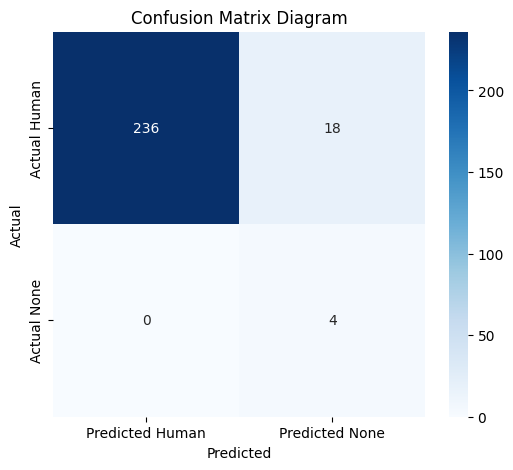

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for single-class
cm = np.array([[236, 18],
               [0, 4]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Human', 'Predicted None'],
            yticklabels=['Actual Human', 'Actual None'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Diagram")
plt.show()  # <-- important
